In [83]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

csv = pd.read_csv('~/Desktop/Jupyter/BRFSS_sample.csv')

df = pd.DataFrame(csv)
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,0,0.0,No,Female,65-69,White,No,Yes,Good,6.0,No,No,No
1,No,No,No,No,3,0.0,No,Female,35-39,Black,No,No,Very good,6.0,Yes,No,No
2,No,No,No,No,10,23.0,No,Female,18-24,White,No,Yes,Very good,6.0,Yes,No,No
3,No,No,No,No,0,0.0,No,Female,50-54,Hispanic,Yes,Yes,Fair,6.0,No,No,No
4,No,Yes,No,No,0,0.0,No,Male,60-64,White,No,No,Good,7.0,No,No,No


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68796 entries, 0 to 68795
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      68796 non-null  object 
 1   Smoking           68796 non-null  object 
 2   AlcoholDrinking   68796 non-null  object 
 3   Stroke            68796 non-null  object 
 4   PhysicalHealth    68796 non-null  int64  
 5   MentalHealth      68795 non-null  float64
 6   DiffWalking       68795 non-null  object 
 7   Sex               68795 non-null  object 
 8   AgeCategory       68795 non-null  object 
 9   Race              68795 non-null  object 
 10  Diabetic          68795 non-null  object 
 11  PhysicalActivity  68795 non-null  object 
 12  GenHealth         68795 non-null  object 
 13  SleepTime         68795 non-null  float64
 14  Asthma            68795 non-null  object 
 15  KidneyDisease     68795 non-null  object 
 16  SkinCancer        68795 non-null  object

In [85]:
df.describe()

,PhysicalHealth,MentalHealth,SleepTime
count,68796.000000,68795.000000,68795.000000
mean,3.351241,3.926594,7.097900
std,7.936026,7.983287,1.436809
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,6.000000
50%,0.000000,0.000000,7.000000
75%,2.000000,3.000000,8.000000
max,30.000000,30.000000,24.000000


In [86]:
# 1. Check for Missing Values
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 HeartDisease        0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        1
DiffWalking         1
Sex                 1
AgeCategory         1
Race                1
Diabetic            1
PhysicalActivity    1
GenHealth           1
SleepTime           1
Asthma              1
KidneyDisease       1
SkinCancer          1
dtype: int64


In [81]:
# Fill missing values
df['SleepTime'] = df['SleepTime'].fillna(df['SleepTime'].mean())
# df['PhysicalActivity'] = df['PhysicalActivity'].fillna(df['PhysicalActivity'].mean())

In [56]:
df.dropna(subset=['SleepTime'])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,0,0.0,No,Female,65-69,White,No,Yes,Good,6.0,No,No,No
1,No,No,No,No,3,0.0,No,Female,35-39,Black,No,No,Very good,6.0,Yes,No,No
2,No,No,No,No,10,23.0,No,Female,18-24,White,No,Yes,Very good,6.0,Yes,No,No
3,No,No,No,No,0,0.0,No,Female,50-54,Hispanic,Yes,Yes,Fair,6.0,No,No,No
4,No,Yes,No,No,0,0.0,No,Male,60-64,White,No,No,Good,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68790,No,No,No,No,0,0.0,No,Female,35-39,Asian,No,No,Excellent,9.0,No,No,No
68791,No,No,No,No,30,10.0,No,Male,60-64,Other,No,Yes,Good,7.0,No,No,No
68792,No,No,Yes,No,0,0.0,No,Male,50-54,White,No,Yes,Excellent,8.0,No,No,No
68793,No,No,No,No,7,0.0,No,Male,45-49,White,No,No,Good,8.0,No,No,No


<Axes: ylabel='AgeCategory'>

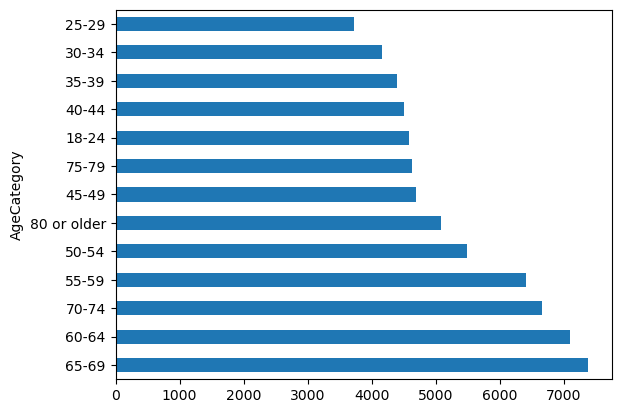

In [13]:
# df['AgeCategory'].sort_values(ascending= True)
df['AgeCategory'].sort_values(ascending= True).value_counts().plot(kind='barh')

In [12]:
# AgeCategory를 범주형(category) 데이터로 변환
df['AgeCategory'] = df['AgeCategory'].astype('category')

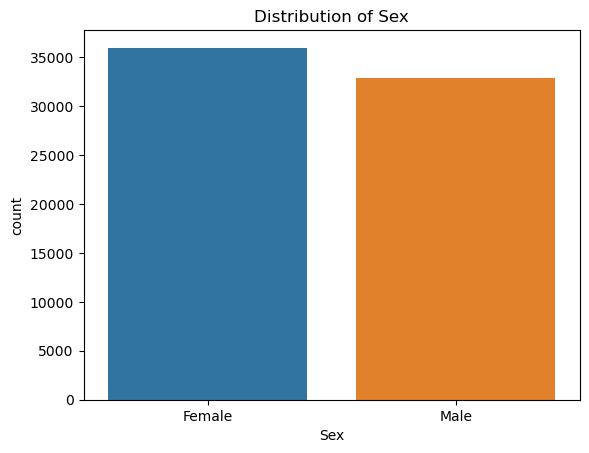

In [16]:
# 성별 분포
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Sex')
plt.show()

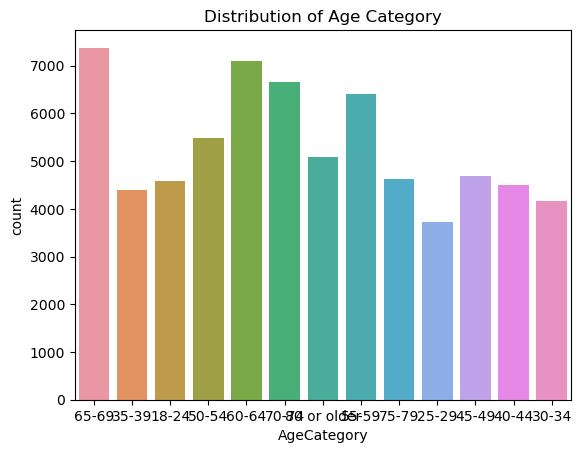

In [17]:
# 나이 분포
sns.countplot(x='AgeCategory', data=df)
plt.title('Distribution of Age Category')
plt.show()

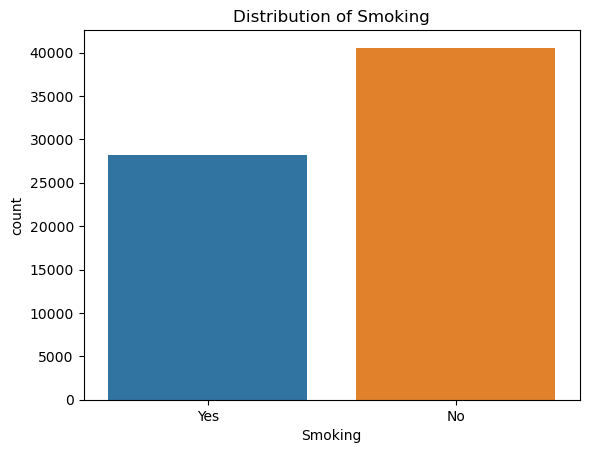

In [18]:
# 흡연 여부 분포
sns.countplot(x='Smoking', data=df)
plt.title('Distribution of Smoking')
plt.show()

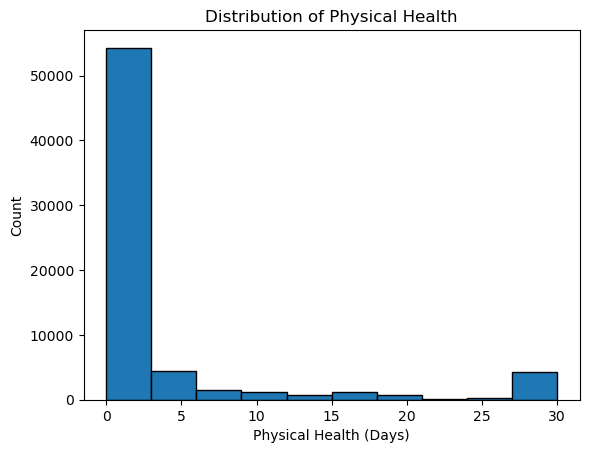

In [19]:
# 신체 건강 분포
plt.hist(df['PhysicalHealth'], bins=10, edgecolor='black')
plt.title('Distribution of Physical Health')
plt.xlabel('Physical Health (Days)')
plt.ylabel('Count')
plt.show()

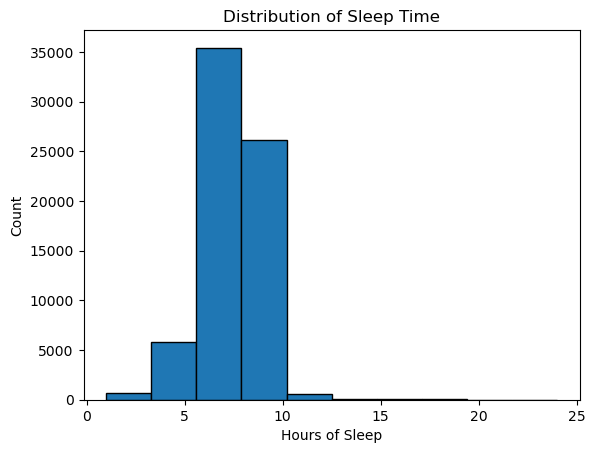

In [20]:
# 수면 시간 분포
plt.hist(df['SleepTime'], bins=10, edgecolor='black')
plt.title('Distribution of Sleep Time')
plt.xlabel('Hours of Sleep')
plt.ylabel('Count')
plt.show()

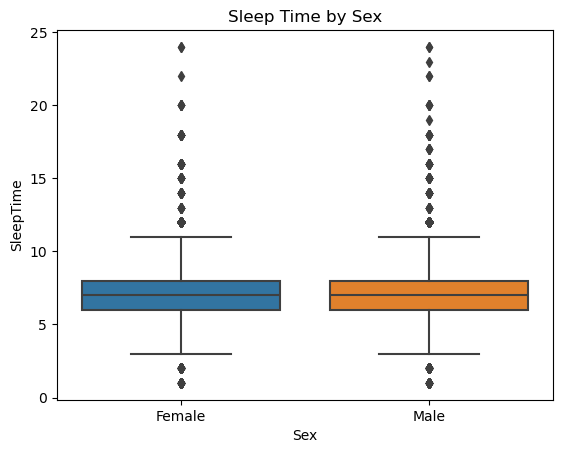

In [21]:
# 성별에 따른 수면 시간 분포
sns.boxplot(x='Sex', y='SleepTime', data=df)
plt.title('Sleep Time by Sex')
plt.show()

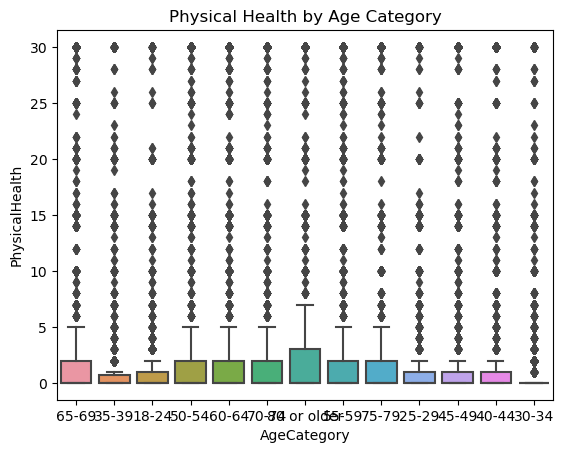

In [22]:
# 나이 카테고리에 따른 신체 건강 분포
sns.boxplot(x='AgeCategory', y='PhysicalHealth', data=df)
plt.title('Physical Health by Age Category')
plt.show()

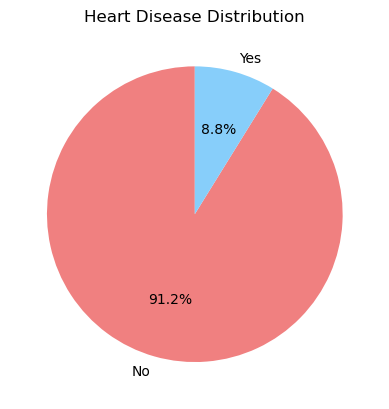

In [23]:
# 심장병 여부에 따른 비율
heart_disease_counts = df['HeartDisease'].value_counts()
plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Heart Disease Distribution')
plt.show()

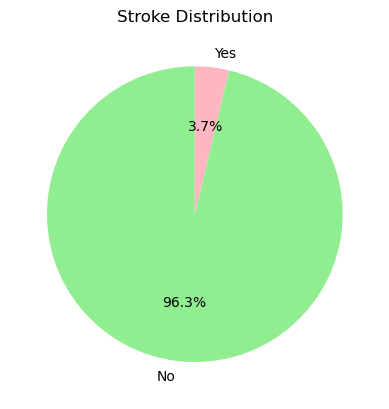

In [24]:
# 뇌졸중 여부에 따른 비율
stroke_counts = df['Stroke'].value_counts()
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightpink'])
plt.title('Stroke Distribution')
plt.show()

#### Hypothesis Testing 1
###### H₀ (귀무가설): 흡연 여부는 심장병 발생 여부와 관련이 없다.
###### H₁ (대립가설): 흡연 여부는 심장병 발생 여부와 관련이 있다.
###### H₀ (Null Hypothesis): Smoking status is not associated with the occurrence of heart disease.
###### H₁ (Alternative Hypothesis): Smoking status is associated with the occurrence of heart disease.

In [74]:
# 교차표 생성
contingency_table = pd.crosstab(df['Smoking'], df['HeartDisease'])
print("교차표:")
print(contingency_table)

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print("\n카이제곱 검정 결과:")
print(f"카이제곱 값: {chi2}")
print(f"P-값: {p}")
print(f"자유도: {dof}")
print("기대 빈도수:")
print(expected)

# 결론
alpha = 0.05
if p < alpha:
    print("\n귀무가설을 기각합니다")
else:
    print("\n귀무가설을 기각하지 않습니다")

교차표:
HeartDisease     No   Yes
Smoking                  
No            38035  2527
Yes           24686  3548

카이제곱 검정 결과:
카이제곱 값: 829.4201459485713
P-값: 2.166379043738107e-182
자유도: 1
기대 빈도수:
[[36980.19073783  3581.80926217]
 [25740.80926217  2493.19073783]]

귀무가설을 기각합니다


#### Hypothesis Testing 2
###### H₀ (귀무가설): 흡연 여부(Smoking)는 수면 시간(SleepTime)에 영향을 미치지 않는다.
###### H₁ (대립가설): 흡연 여부는 수면 시간에 영향을 미친다.
###### H₀ (Null Hypothesis): Smoking does not affect sleep time.
###### H₁ (Alternative Hypothesis): Smoking affects sleep time.

In [75]:
# 흡연자와 비흡연자의 수면 시간 추출
smoking_group = df[df['Smoking'] == 'Yes']['SleepTime']
non_smoking_group = df[df['Smoking'] == 'No']['SleepTime']

# T-검정 수행
t_stat, p_value = stats.ttest_ind(smoking_group, non_smoking_group)
print( stats.ttest_ind(smoking_group, non_smoking_group))

# 결과 출력
print("T-검정 결과:")
print(f"T-통계량: {t_stat}")
print(f"P-값: {p_value}")

# 결론
alpha = 0.05
if p_value < alpha:
    print("\n귀무가설을 기각합니다: 흡연자와 비흡연자 간에 수면 시간에 유의미한 차이가 있습니다.")
else:
    print("\n귀무가설을 기각하지 않습니다: 흡연자와 비흡연자 간에 수면 시간에 유의미한 차이가 없습니다.")

TtestResult(statistic=-9.198091888785505, pvalue=3.741850832195098e-20, df=68794.0)
T-검정 결과:
T-통계량: -9.198091888785505
P-값: 3.741850832195098e-20

귀무가설을 기각합니다: 흡연자와 비흡연자 간에 수면 시간에 유의미한 차이가 있습니다.


#### Hypothesis Testing 3
###### H₀ (귀무가설): 흡연 여부는 피부암(SkinCancer) 발생과 관련이 없다.
###### H₁ (대립가설): 흡연 여부는 피부암 발생과 관련이 있다
###### H₀ (Null Hypothesis): Smoking status is not related to the occurrence of skin cancer.
###### H₁ (Alternative Hypothesis): Smoking status is related to the occurrence of skin cancer.

In [76]:
# 교차표 생성
contingency_table = pd.crosstab(df['Smoking'], df['SkinCancer'])
print("교차표:")
print(contingency_table)

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print("\n카이제곱 검정 결과:")
print(f"카이제곱 값: {chi2}")
print(f"P-값: {p}")
print(f"자유도: {dof}")
print("기대 빈도수:")
print(expected)

# 결론
alpha = 0.05
if p < alpha:
    print("\n귀무가설을 기각합니다: 흡연과 피부암 간에 유의미한 관계가 있습니다.")
else:
    print("\n귀무가설을 기각하지 않습니다: 흡연과 피부암 간에 유의미한 관계가 없습니다.")

교차표:
SkinCancer     No   Yes
Smoking                
No          37071  3490
Yes         25219  3015

카이제곱 검정 결과:
카이제곱 값: 83.41662981333066
P-값: 6.646054808870276e-20
자유도: 1
기대 빈도수:
[[36725.70230395  3835.29769605]
 [25564.29769605  2669.70230395]]

귀무가설을 기각합니다: 흡연과 피부암 간에 유의미한 관계가 있습니다.


#### Hypothesis Testing 4
###### H₀ (귀무가설): 나이대(AgeCategory)는 수면 시간(SleepTime)과 관련이 없다.
###### H₁ (대립가설): 나이대는 수면 시간과 관련이 있다
###### H₀ (Null Hypothesis): Age category is not related to sleep time.
###### H₁ (Alternative Hypothesis): Age category is related to sleep time

In [87]:
# 나이대별 수면 시간 추출
groups = df.groupby('AgeCategory')['SleepTime'].apply(list)

# ANOVA 검정 수행
f_stat, p_value = stats.f_oneway(*groups)
print(stats.f_oneway(*groups))

# 결과 출력
print("ANOVA 검정 결과:")
print(f"F-통계량: {f_stat}")
print(f"P-값: {p_value}")

# 결론
alpha = 0.05
if p_value < alpha:
    print("\n귀무가설을 기각합니다: 나이대에 따라 수면 시간에 유의미한 차이가 있습니다.")
else:
    print("\n귀무가설을 기각하지 않습니다: 나이대에 따라 수면 시간에 유의미한 차이가 없습니다.")

F_onewayResult(statistic=126.60748439182954, pvalue=9.135064263e-315)
ANOVA 검정 결과:
F-통계량: 126.60748439182954
P-값: 9.135064263e-315

귀무가설을 기각합니다: 나이대에 따라 수면 시간에 유의미한 차이가 있습니다.


#### Hypothesis Testing 5
###### H₀ (귀무가설): 신체 활동 여부는 신체 건강(PhysicalHealth) 상태에 영향을 미치지 않는다
###### H₁ (대립가설): 신체 활동 여부는 신체 건강 상태에 영향을 미친다
###### H₀ (Null Hypothesis): Physical activity does not affect physical health.
###### H₁ (Alternative Hypothesis): Physical activity affects physical health.

In [88]:
# 신체 활동 그룹에 따라 신체 건강 일수 분리
active_group = df[df['PhysicalActivity'] == 'Yes']['PhysicalHealth']
inactive_group = df[df['PhysicalActivity'] == 'No']['PhysicalHealth']

# T-검정 수행
t_stat, p_value = stats.ttest_ind(active_group, inactive_group)
print(stats.ttest_ind(active_group, inactive_group))

# 결과 출력
print("T-검정 결과:")
print(f"T-통계량: {t_stat}")
print(f"P-값: {p_value}")

# 결론
alpha = 0.05
if p_value < alpha:
    print("\n귀무가설을 기각합니다: 신체 활동 여부에 따라 신체 건강 상태에 유의미한 차이가 있습니다.")
else:
    print("\n귀무가설을 기각하지 않습니다: 신체 활동 여부에 따라 신체 건강 상태에 유의미한 차이가 없습니다.")

TtestResult(statistic=-63.43817378898995, pvalue=0.0, df=68793.0)
T-검정 결과:
T-통계량: -63.43817378898995
P-값: 0.0

귀무가설을 기각합니다: 신체 활동 여부에 따라 신체 건강 상태에 유의미한 차이가 있습니다.


#### Hypothesis Testing 6
###### H₀ (귀무가설): 정신 건강 점수는 신체 활동 여부와 상관없이 평균이 같다.
###### H₁ (대립가설): 정신 건강 점수는 신체 활동 여부에 따라 평균이 다르다.
###### H₀ (Null Hypothesis): Physical activity does not affect physical health.
###### H₁ (Alternative Hypothesis): Physical activity affects physical health.

In [89]:
# 신체 활동 그룹과 비활동 그룹의 정신 건강 점수 추출
active_group = df[df['PhysicalActivity'] == 'Yes']['MentalHealth']
inactive_group = df[df['PhysicalActivity'] == 'No']['MentalHealth']

# T-검정 수행
t_stat, p_value = stats.ttest_ind(active_group, inactive_group)
print(stats.ttest_ind(active_group, inactive_group))

# 결과 출력
print("T-검정 결과:")
print(f"T-통계량: {t_stat}")
print(f"P-값: {p_value}")

# 결론
alpha = 0.05
if p_value < alpha:
    print("\n귀무가설을 기각합니다: 신체 활동 여부에 따라 정신 건강 점수에 유의미한 차이가 있습니다.")
else:
    print("\n귀무가설을 기각하지 않습니다: 신체 활동 여부에 따라 정신 건강 점수에 유의미한 차이가 없습니다.")

TtestResult(statistic=-25.443079381964814, pvalue=3.843057649856888e-142, df=68793.0)
T-검정 결과:
T-통계량: -25.443079381964814
P-값: 3.843057649856888e-142

귀무가설을 기각합니다: 신체 활동 여부에 따라 정신 건강 점수에 유의미한 차이가 있습니다.


#### Hypothesis Testing 7
###### H₀ (귀무가설): 심장병 여부(HeartDisease)는 신체 건강 상태(PhysicalHealth)에 영향을 미치지 않는다.
###### H₁ (대립가설): 심장병 여부는 신체 건강 상태에 영향을 미친다
###### H₀ (Null Hypothesis): Heart disease does not affect physical health.
###### H₁ (Alternative Hypothesis): Heart disease affects physical health

In [38]:
# 심장병 그룹에 따라 신체 건강 일수 분리
heart_disease_group = df[df['HeartDisease'] == 'Yes']['PhysicalHealth']
no_heart_disease_group = df[df['HeartDisease'] == 'No']['PhysicalHealth']

# T-검정 수행
t_stat, p_value = stats.ttest_ind(heart_disease_group, no_heart_disease_group)

# 결과 출력
print("T-검정 결과:")
print(f"T-통계량: {t_stat}")
print(f"P-값: {p_value}")

# 결론
alpha = 0.05
if p_value < alpha:
    print("\n귀무가설을 기각합니다: 심장병 여부에 따라 신체 건강 일수에 유의미한 차이가 있습니다.")
else:
    print("\n귀무가설을 기각하지 않습니다: 심장병 여부에 따라 신체 건강 일수에 유의미한 차이가 없습니다.")

T-검정 결과:
T-통계량: 45.55254840210171
P-값: 0.0

귀무가설을 기각합니다: 심장병 여부에 따라 신체 건강 일수에 유의미한 차이가 있습니다.


#### Hypothesis Testing 8
###### H₀ (귀무가설): 성별(Sex)은 정신 건강(MentalHealth) 상태에 영향을 미치지 않는다.
###### H₁ (대립가설): 성별은 정신 건강 상태에 영향을 미친다
###### H₀ (Null Hypothesis): Gender does not affect mental health.
###### H₁ (Alternative Hypothesis): Gender affects mental health

In [37]:
# 성별 그룹에 따라 정신 건강 일수 분리
female_group = df[df['Sex'] == 'Female']['MentalHealth']
male_group = df[df['Sex'] == 'Male']['MentalHealth']

# T-검정 수행
t_stat, p_value = stats.ttest_ind(female_group, male_group)

# 결과 출력
print("T-검정 결과:")
print(f"T-통계량: {t_stat}")
print(f"P-값: {p_value}")

# 결론
alpha = 0.05
if p_value < alpha:
    print("\n귀무가설을 기각합니다: 성별에 따라 정신 건강 일수에 유의미한 차이가 있습니다.")
else:
    print("\n귀무가설을 기각하지 않습니다: 성별에 따라 정신 건강 일수에 유의미한 차이가 없습니다.")

T-검정 결과:
T-통계량: 26.21825670981845
P-값: 9.10600976411222e-151

귀무가설을 기각합니다: 성별에 따라 정신 건강 일수에 유의미한 차이가 있습니다.


#### Hypothesis Testing 9
###### H₀ (귀무가설): 당뇨병 여부(Diabetic)는 신장 질환(KidneyDisease) 발생과 관련이 없다.
###### H₁ (대립가설): 당뇨병 여부는 신장 질환 발생과 관련이 있다
###### H₀ (Null Hypothesis): Diabetes is not related to the occurrence of kidney disease.
###### H₁ (Alternative Hypothesis): Diabetes is related to the occurrence of kidney disease.

In [36]:
# 교차표 생성
contingency_table = pd.crosstab(df['Diabetic'], df['KidneyDisease'])
print("교차표:")
print(contingency_table)

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print("\n카이제곱 검정 결과:")
print(f"카이제곱 값: {chi2}")
print(f"P-값: {p}")
print(f"자유도: {dof}")
print("기대 빈도수:")
print(expected)

# 결론
alpha = 0.05
if p < alpha:
    print("\n귀무가설을 기각합니다: 당뇨병 여부와 신장 질환 간에 유의미한 관계가 있습니다.")
else:
    print("\n귀무가설을 기각하지 않습니다: 당뇨병 여부와 신장 질환 간에 유의미한 관계가 없습니다.")

교차표:
KidneyDisease               No   Yes
Diabetic                            
No                       56599  1480
No, borderline diabetes   1335    56
Yes                       7794   988
Yes (during pregnancy)     529    14

카이제곱 검정 결과:
카이제곱 값: 1628.1465034845512
P-값: 0.0
자유도: 3
기대 빈도수:
[[5.59363370e+04 2.14266301e+03]
 [1.33968293e+03 5.13170725e+01]
 [8.45801256e+03 3.23987441e+02]
 [5.22967527e+02 2.00324733e+01]]

귀무가설을 기각합니다: 당뇨병 여부와 신장 질환 간에 유의미한 관계가 있습니다.


#### Correlation 1
###### Correlation Between Physical Health and Mental Health

#### Correlation 2
###### Correlation Between Physical Activity and Physical Health

#### Correlation 2
###### Correlation Between Physical Activity and Physical Health

In [90]:
# 신체 건강과 정신 건강 간의 상관관계
# 피어슨 상관계수 계산
correlation = df['PhysicalHealth'].corr(df['MentalHealth'], method='pearson')

# 결과 출력
print("피어슨 상관계수:", correlation)

피어슨 상관계수: 0.2889870879725878


In [99]:
# 정신 건강과 수면 시간 상관계수
# Calculate the Pearson correlation coefficient between MentalHealth and SleepTime
correlation = df['MentalHealth'].corr(df['SleepTime'], method='pearson')

# Output the result
print("Pearson Correlation Coefficient:", correlation)

Pearson Correlation Coefficient: -0.11324771465427293


In [105]:
# Convert AlcoholDrinking to numeric (Yes -> 1, No -> 0)
df['AlcoholDrinking'] = df['AlcoholDrinking'].map({'Yes': 1, 'No': 0})

# Calculate the Pearson correlation coefficient for Alcohol Drinking and Physical Health
physical_corr = df['AlcoholDrinking'].corr(df['PhysicalHealth'], method='pearson')

# Calculate the Pearson correlation coefficient for Alcohol Drinking and Mental Health
mental_corr = df['AlcoholDrinking'].corr(df['MentalHealth'], method='pearson')

# Output the results
print("Pearson Correlation Coefficient between Alcohol Drinking and Physical Health:", physical_corr)
print("Pearson Correlation Coefficient between Alcohol Drinking and Mental Health:", mental_corr)

Pearson Correlation Coefficient between Alcohol Drinking and Physical Health: -0.018289479110830835
Pearson Correlation Coefficient between Alcohol Drinking and Mental Health: 0.05526176837666211


In [ ]:
Correlation Between Alcohol Consumption and Mental Health